### Federal Reserve Currency Exchange Rates

In [1]:
## Importing Packages 

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg


In [2]:
## Import the dataset to read and analyse
data = pd.read_csv("C:\\Users\\User\\Desktop\\PROJECT GITHUB\\PYTHON\\Foreign Exchange Rates 2000-2019\\Foreign_Exchange_Rates_data.csv")

## Data Inspection and Data Wrangling for EDA

In [3]:
# Display first 5 rows
data

Time_Series  AUSTRALIAN_DOLLAR/US$  EURO/US$  UK_POUND/US$  \
0     2000-01-03                 1.5172    0.9847        0.6146   
1     2000-01-04                 1.5239    0.9700        0.6109   
2     2000-01-05                 1.5267    0.9676        0.6092   
3     2000-01-06                 1.5291    0.9686        0.6070   
4     2000-01-07                 1.5272    0.9714        0.6104   
...          ...                    ...       ...           ...   
5014  2019-12-24                 1.4445    0.9022        0.7719   
5015  2019-12-26                 1.4411    0.9007        0.7688   
5016  2019-12-27                 1.4331    0.8949        0.7639   
5017  2019-12-30                 1.4278    0.8915        0.7610   
5018  2019-12-31                 1.4225    0.8907        0.7536   

      CANADIAN_DOLLAR/US$  US$  
0                  1.4465  1.0  
1                  1.4518  1.0  
2                  1.4518  1.0  
3                  1.4571  1.0  
4                  1.4505  1.0  
...                   ...  ...  
5014               1.3160  1.0  
5015               1.3124  1.0  
5016               1.3073  1.0  
5017               1.3058  1.0  
5018               1.2962  1.0  

[5019 rows x 6 columns]

In [4]:
#View number of rows and columns
data.shape

(5019, 6)

In [5]:
# View information about the DataFrame with .info() function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time_Series            5019 non-null   object 
 1   AUSTRALIAN_DOLLAR/US$  5019 non-null   float64
 2   EURO/US$               5019 non-null   float64
 3   UK_POUND/US$           5019 non-null   float64
 4   CANADIAN_DOLLAR/US$    5019 non-null   float64
 5   US$                    5019 non-null   float64
dtypes: float64(5), object(1)
memory usage: 235.4+ KB


In [6]:
## Set Time_Series as index
data['Time_Series'] = pd.to_datetime(data['Time_Series'])
data.set_index('Time_Series', inplace=True)

## Data Wrangling

## Explore

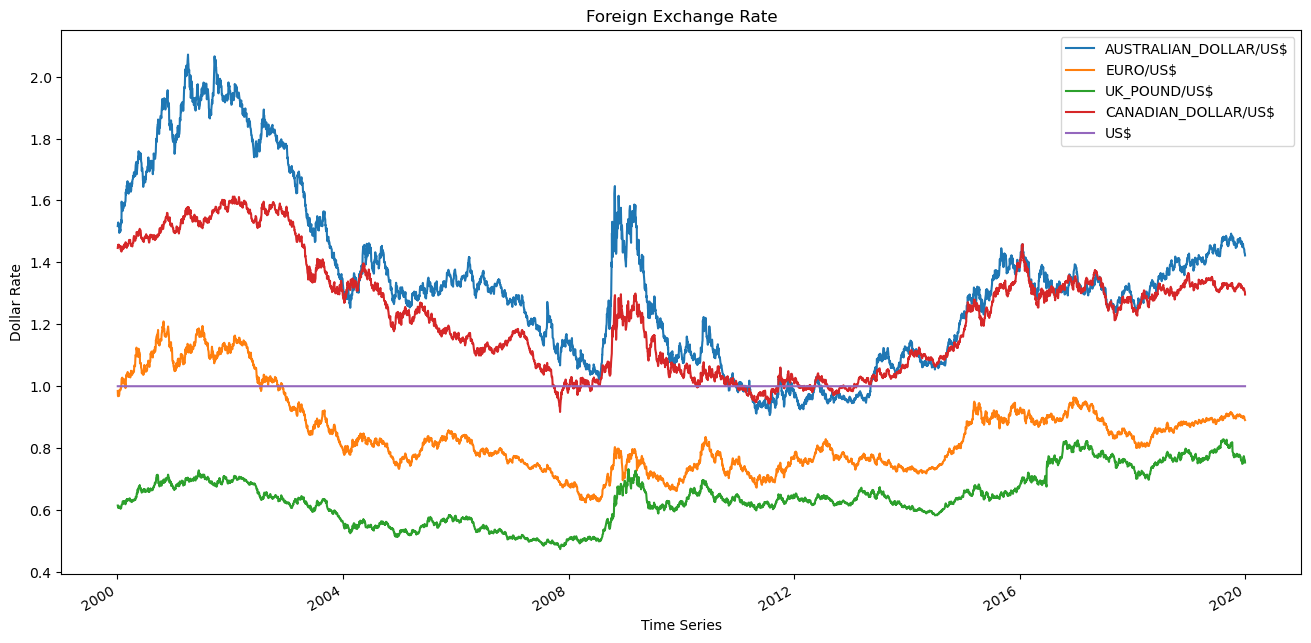

In [7]:
## Plot the time series 
fig, ax = plt.subplots(figsize=(16, 8)) 
data.fillna(method = "ffill").plot(ax = ax, xlabel = "Time Series" ,
                                   ylabel = "Dollar Rate" ,
                                   title = "Foreign Exchange Rate" );

<Axes: title={'center': 'Foreign Exchange Rate'}, xlabel='Time_Series', ylabel='Dollar Rate'>

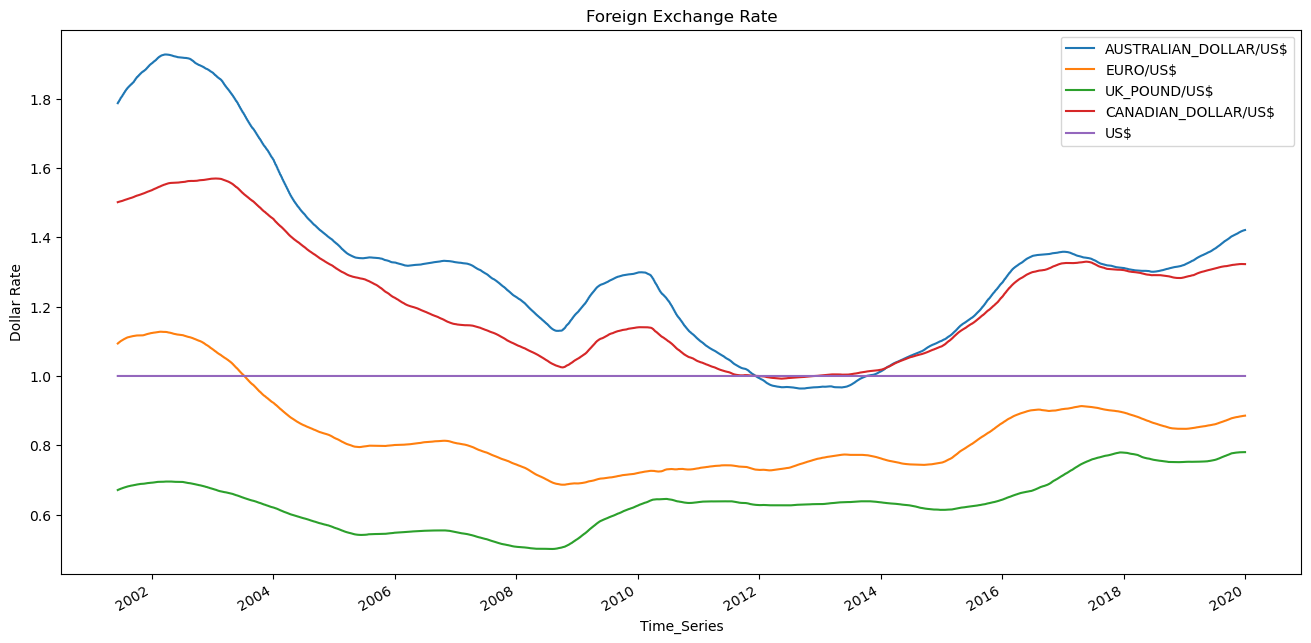

In [8]:
## Analyze the Rolling Average based on months

fig, ax = plt.subplots(figsize=(16, 8))
data.rolling(365).mean().plot(ax = ax,
                              ylabel = "Dollar Rate",
                              title = "Foreign Exchange Rate"  )

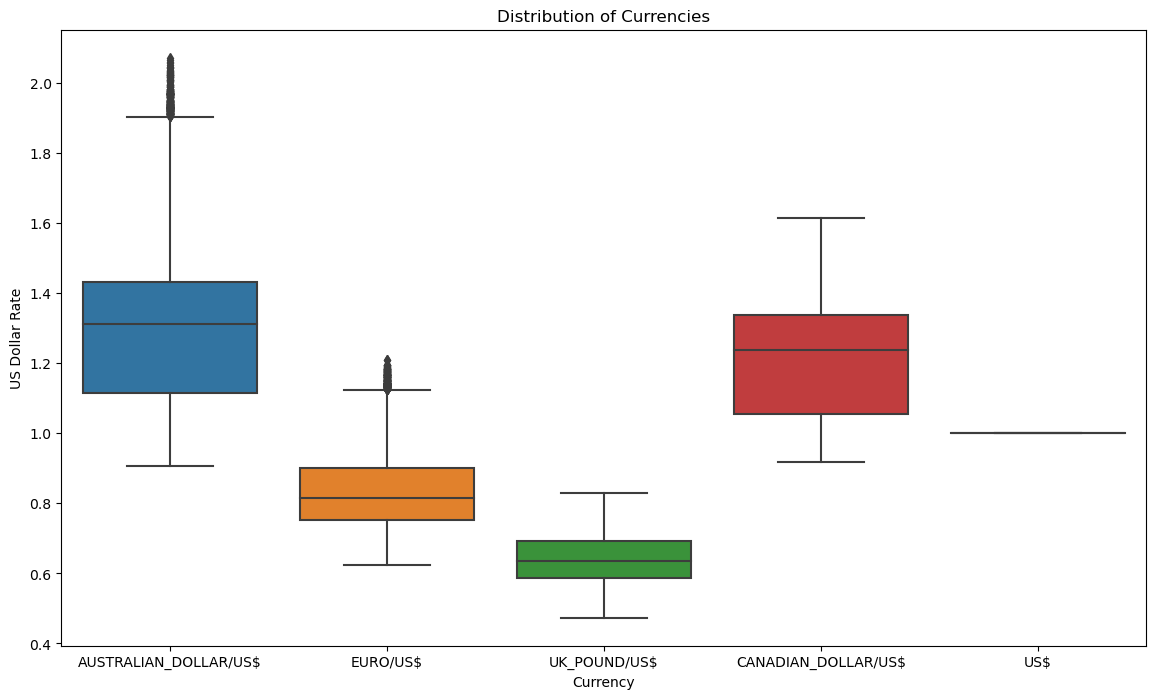

In [9]:
## OBSERVE THE DISTRIBUTION OF THE CURRENCIES

plt.figure(figsize=(14, 8))
sns.boxplot( data= data)
plt.title('Distribution of Currencies')
plt.xlabel('Currency')
plt.ylabel('US Dollar Rate')
plt.show()


## AUTOREGRESSIVE MODELS

In [10]:
## Resample to 1 week

data = data.resample("7D").mean().fillna(method='ffill')
data

AUSTRALIAN_DOLLAR/US$  EURO/US$  UK_POUND/US$  \
Time_Series                                                  
2000-01-03                1.524820   0.97246       0.61042   
2000-01-10                1.512220   0.97560       0.60860   
2000-01-17                1.505975   0.98840       0.60735   
2000-01-24                1.543380   1.00562       0.60998   
2000-01-31                1.574380   1.02246       0.62244   
...                            ...       ...           ...   
2019-12-02                1.462800   0.90260       0.76544   
2019-12-09                1.458740   0.90104       0.75768   
2019-12-16                1.454480   0.89920       0.76230   
2019-12-23                1.441100   0.89985       0.76970   
2019-12-30                1.425150   0.89110       0.75730   

             CANADIAN_DOLLAR/US$  US$  
Time_Series                            
2000-01-03              1.451540  1.0  
2000-01-10              1.453600  1.0  
2000-01-17              1.448325  1.0  
2000-01-24              1.440260  1.0  
2000-01-31              1.446080  1.0  
...                          ...  ...  
2019-12-02              1.324800  1.0  
2019-12-09              1.320840  1.0  
2019-12-16              1.314440  1.0  
2019-12-23              1.313100  1.0  
2019-12-30              1.301000  1.0  

[1044 rows x 5 columns]

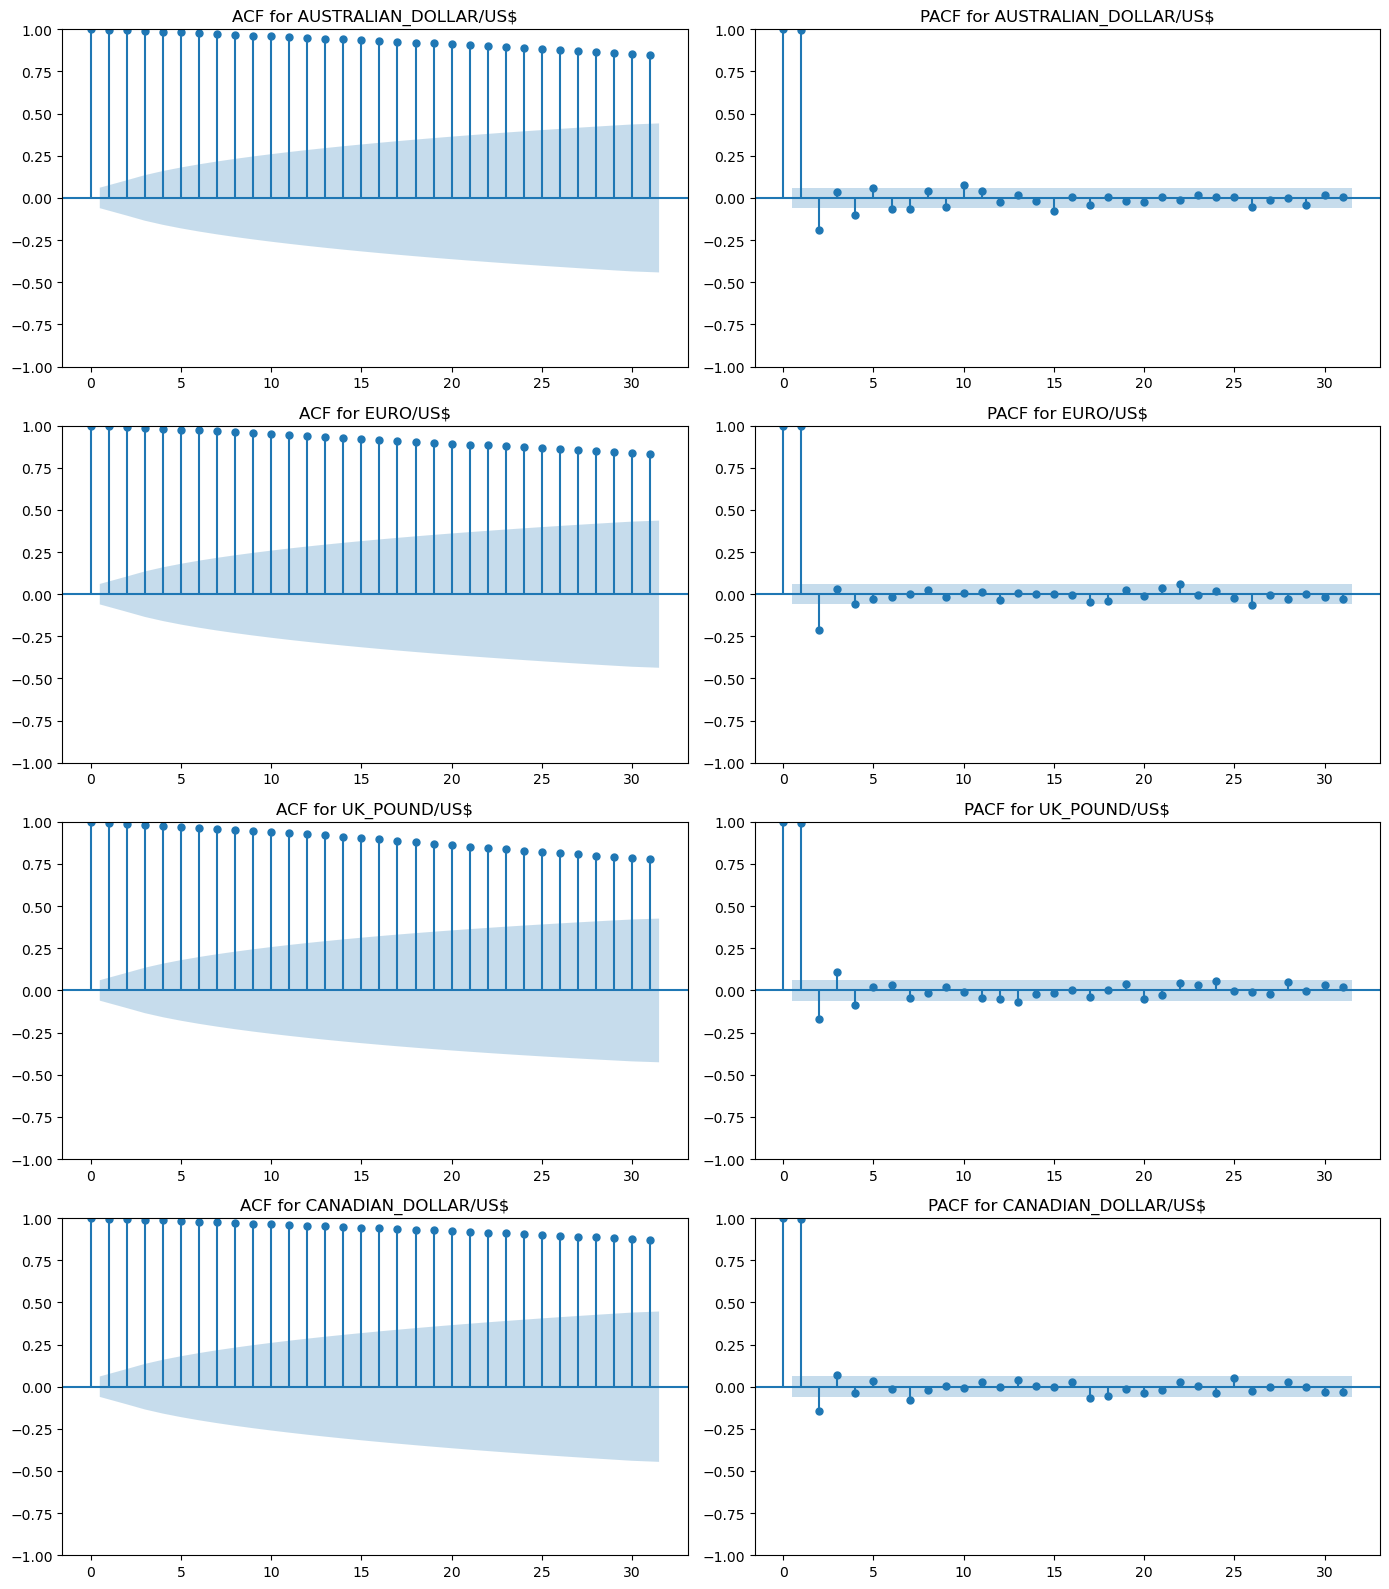

In [11]:
## Analyze the ACF and PACF Plots

fig, axes = plt.subplots(4, 2, figsize=(14, 16))

for i, currency in enumerate(data.columns[:4]):
    plot_acf(data[currency], ax=axes[i, 0], title=f'ACF for {currency}')
    plot_pacf(data[currency], ax=axes[i, 1], title=f'PACF for {currency}')

plt.tight_layout()
plt.show()

In [12]:
### Buidling the Model to Predict Exchange Rates

Baseline Model MAE 0.21702610644410197
Training MAE: 0.013177670039256854


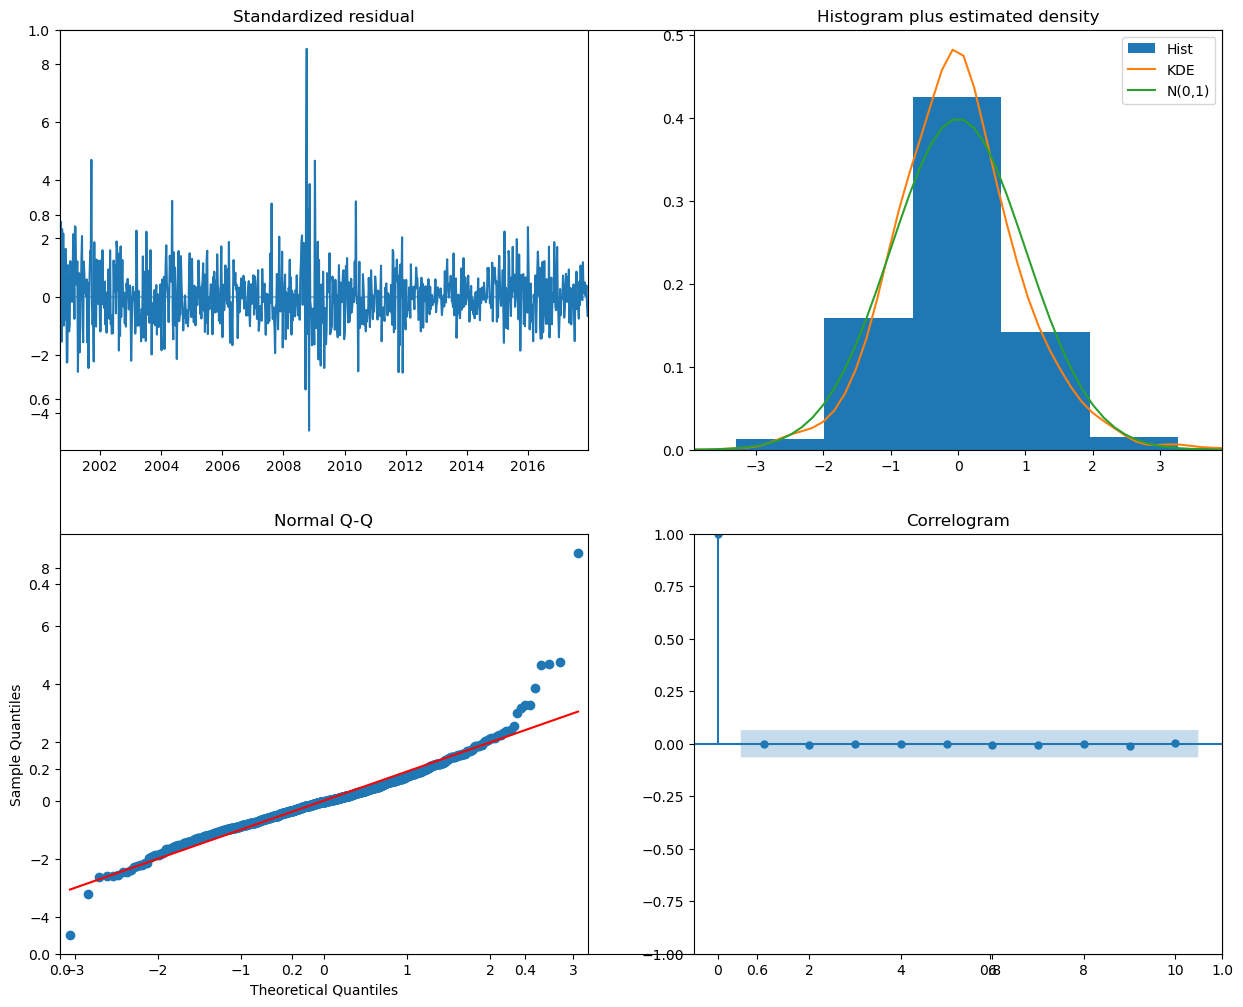

Test MAE (walk forward validation): 0.01


Baseline Model MAE 0.10644572974897958
Training MAE: 0.00695302428018648


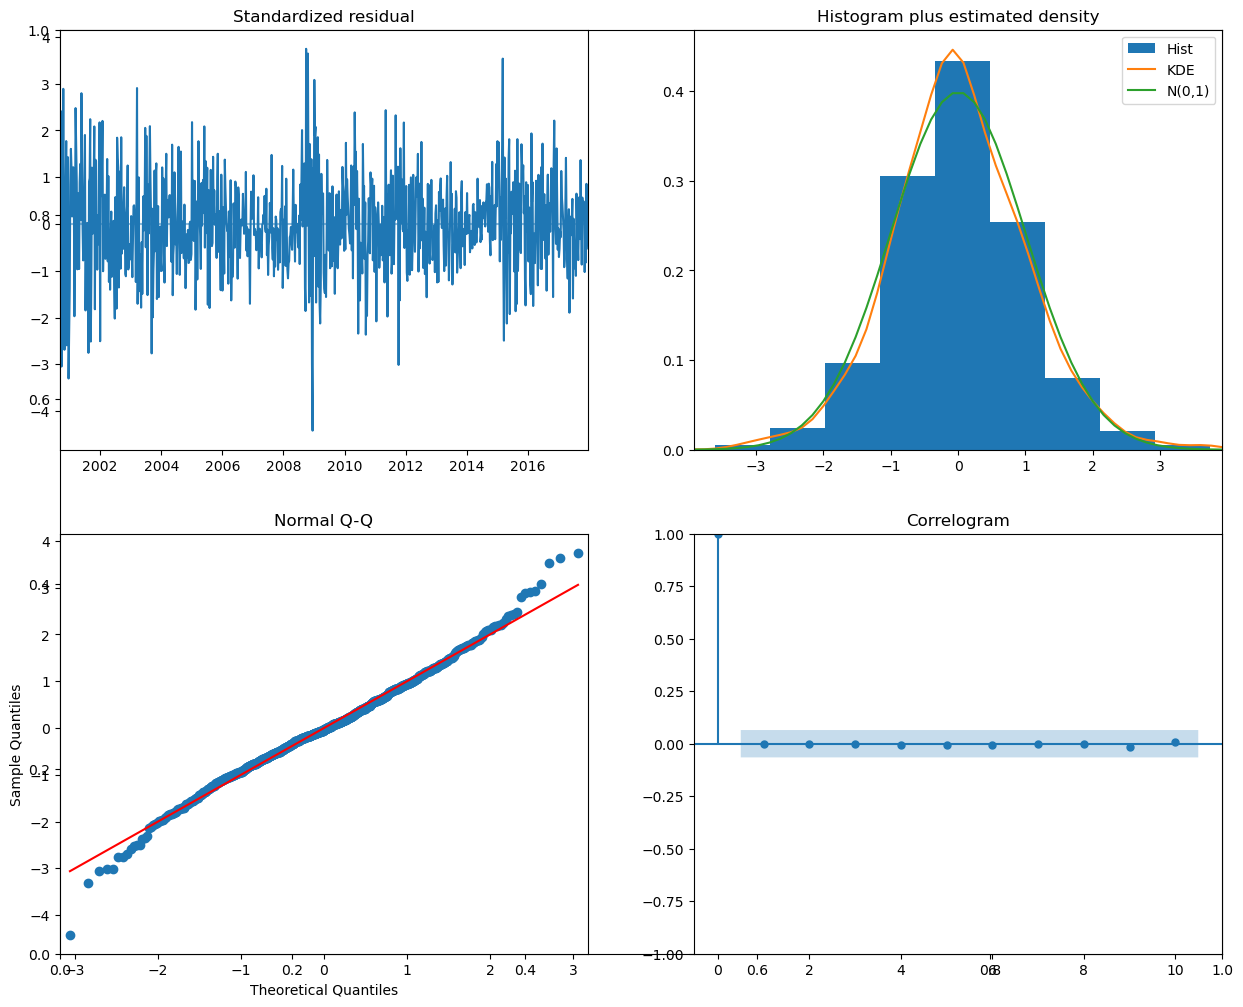

Test MAE (walk forward validation): 0.0


Baseline Model MAE 0.05732754885048672
Training MAE: 0.004876276105209055


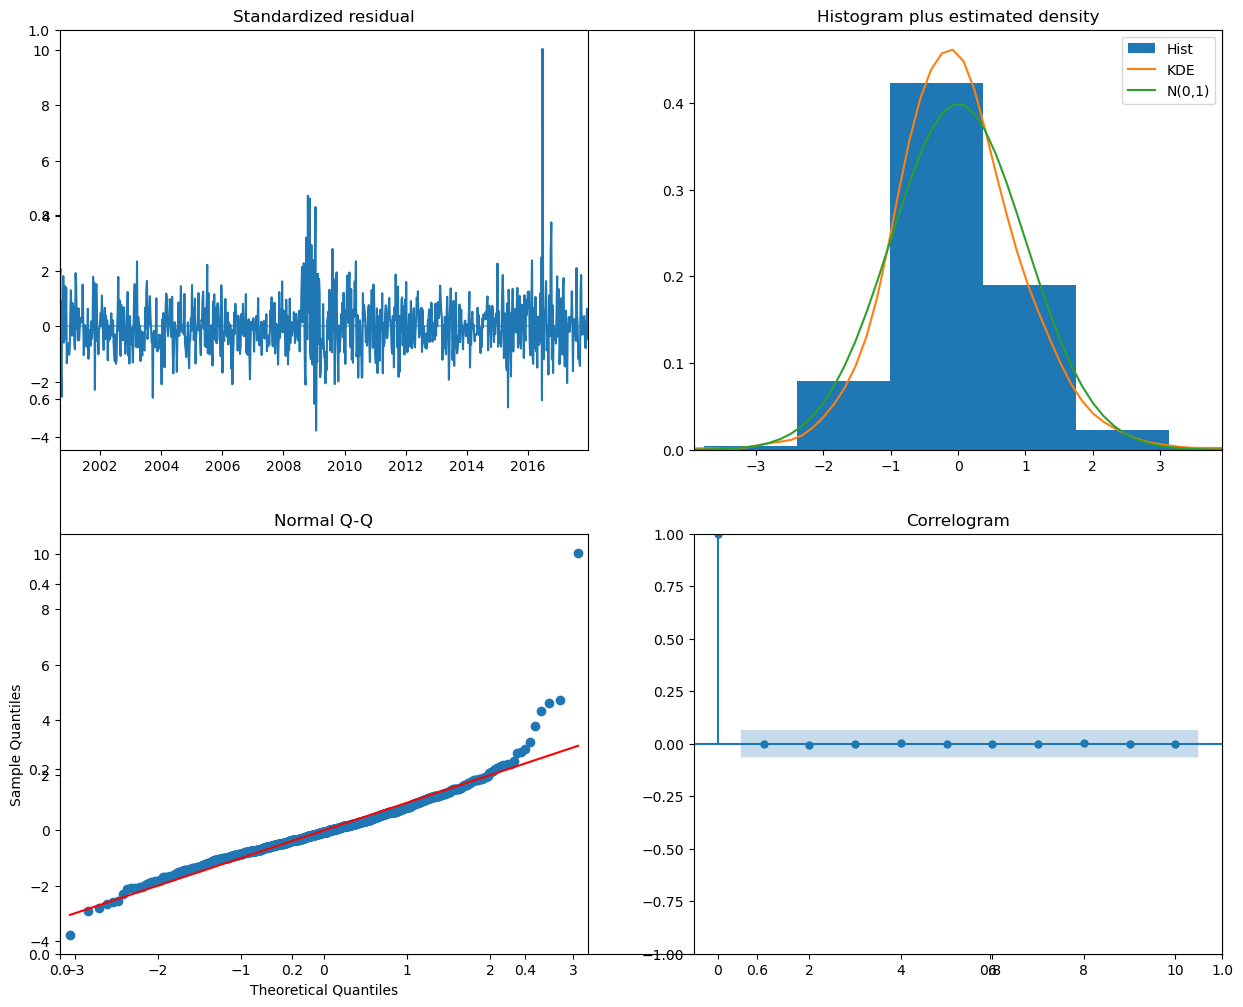

Test MAE (walk forward validation): 0.01


Baseline Model MAE 0.16220592475775597
Training MAE: 0.008970011875230383


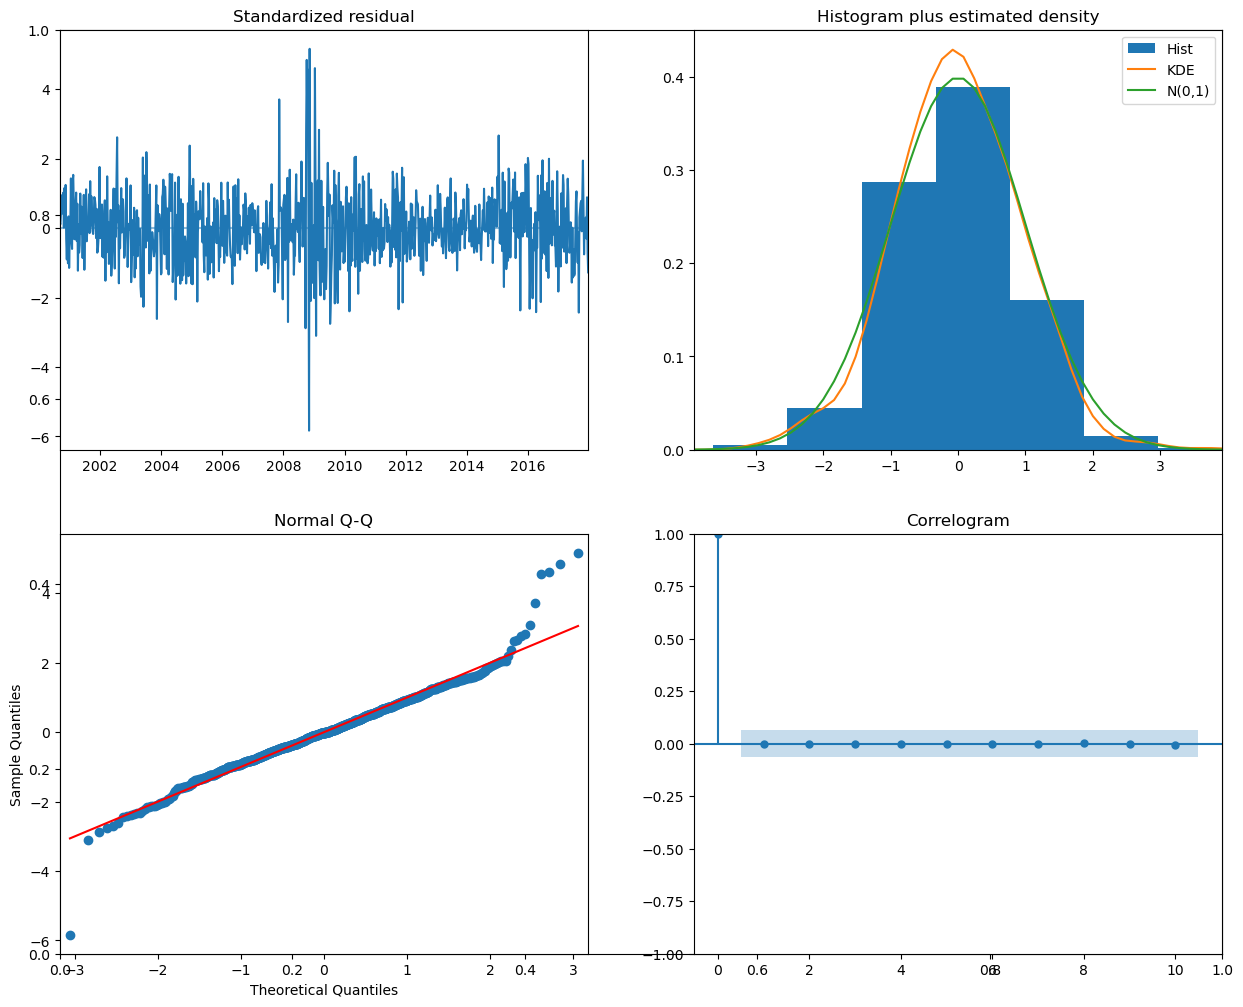

Test MAE (walk forward validation): 0.01


In [13]:
for idx, currency in enumerate(data.columns[:4]):
    
    ## Set a 90% boundary to split the dataset
    boundary = int(len(data[currency]) * 0.90)

    y_train = data[currency].iloc[:boundary]
    y_test = data[currency].iloc[boundary:]

    y_train_mean = y_train.mean()
    y_baseline_pred = [y_train_mean] * len(y_train)
    mae = mean_absolute_error(y_train, y_baseline_pred)

    # The AR model
    model = AutoReg(y_train, lags=35).fit()
    y_pred = model.predict().dropna()
    training_mae = mean_absolute_error(y_train.iloc[35:], y_pred)

    print("Baseline Model MAE", mae)
    print("Training MAE:", training_mae)

    # Plotting the Residuals
    fig, ax = plt.subplots(figsize=(15, 12))
    model.plot_diagnostics(fig=fig)
    plt.show()


    # Performing A Walk Forward Validation
    y_pred_wfv = pd.Series(dtype=y_train.dtype)
    history = y_train.copy()

    for i in range(len(y_test)):
        model = AutoReg(history, lags=35).fit()
        next_pred = model.forecast()
        y_pred_wfv = pd.concat([y_pred_wfv, pd.Series(next_pred, index=[y_test.index[i]])])
        history = pd.concat([history, y_test[next_pred.index]])

    test_mae_wfv = mean_absolute_error(y_test, y_pred_wfv)
    print("Test MAE (walk forward validation):", round(test_mae_wfv, 2))

    # Creating A DataFrame and plotting our prediction
    df_pred_test = pd.DataFrame(
        {"y_test": y_test, "y_pred": y_pred_wfv}, index=y_test.index
    )

    fig = px.line(df_pred_test, labels={"value": currency})
    fig.show()